In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# items = pd.read_csv('olist_order_items_dataset.csv')
# items_all = items.groupby('order_id').agg({'price': 'sum', 'freight_value': 'sum'}).reset_index()
# items_all = items_all.drop(items_all.columns[[2]], axis=1)
payments = pd.read_csv('olist_order_payments_dataset.csv')
payments = payments.drop(payments.columns[[0,1]], axis=1)
# len(items_all)
# len(payments)
payments

,payment_type,payment_installments,payment_value
0,credit_card,8,99.33
1,credit_card,1,24.39
2,credit_card,1,65.71
3,credit_card,8,107.78
4,credit_card,2,128.45
...,...,...,...
103881,boleto,1,363.31
103882,credit_card,2,96.80
103883,credit_card,1,47.77
103884,credit_card,5,369.54


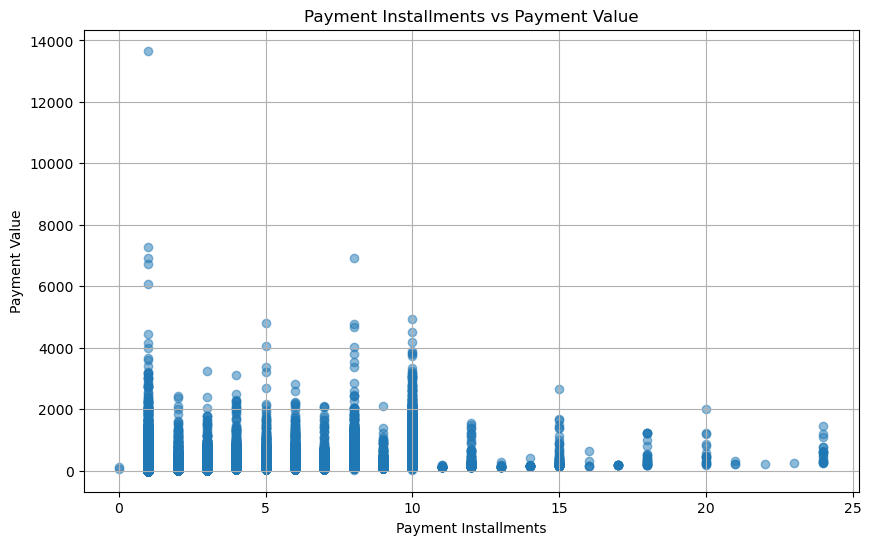

In [3]:

plt.figure(figsize=(10, 6))  # 设置图形大小

plt.scatter(payments['payment_installments'], payments['payment_value'], alpha=0.5)  # 绘制散点图
plt.title('Payment Installments vs Payment Value')  # 设置标题
plt.xlabel('Payment Installments')  # 设置横坐标标签
plt.ylabel('Payment Value')  # 设置纵坐标标签

plt.grid(True)  # 添加网格线

plt.show()  # 显示图形


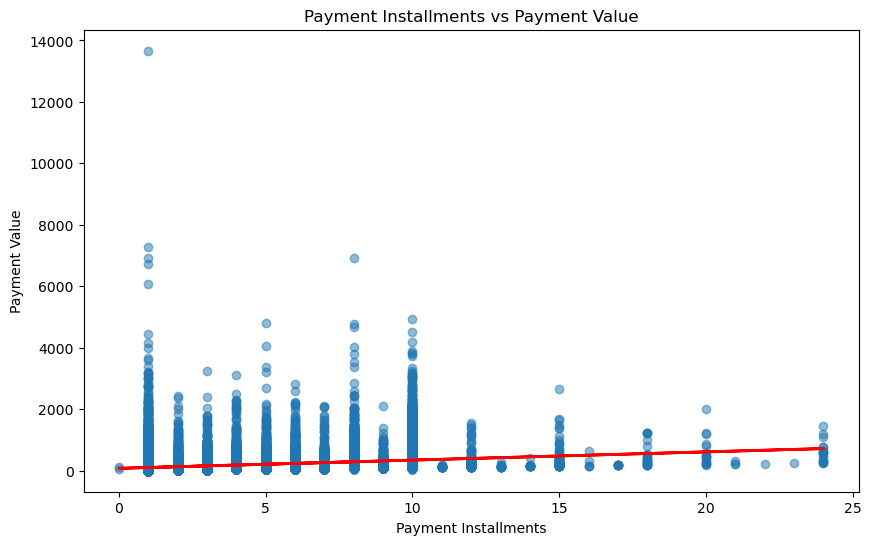

In [4]:
plt.figure(figsize=(10, 6))  # 设置图形大小

plt.scatter(payments['payment_installments'], payments['payment_value'], alpha=0.5)  # 绘制散点图
plt.title('Payment Installments vs Payment Value')  # 设置标题
plt.xlabel('Payment Installments')  # 设置横坐标标签
plt.ylabel('Payment Value')  # 设置纵坐标标签

plt.grid(False)  # 添加网格线

# 计算线性回归拟合线
X = payments['payment_installments'].values.reshape(-1, 1)  # 特征变量
y = payments['payment_value'].values  # 目标变量

model = LinearRegression()
model.fit(X, y)  # 拟合模型

# 绘制拟合线
plt.plot(X, model.predict(X), color='red', linewidth=2)  # 绘制拟合线

plt.show()  # 显示图形


In [5]:
payments = pd.read_csv('olist_order_payments_dataset.csv')
payments = payments.drop(payments.columns[[1,2]], axis=1)
payments

,order_id,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,2,128.45
...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,363.31
103882,7b905861d7c825891d6347454ea7863f,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,5,369.54


In [6]:
orders = pd.read_csv('olist_orders_dataset.csv')
orders = orders.drop(orders.columns[[1,2,4,5,6,7]], axis=1)
orders

,order_id,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,2017/10/2 10:56
1,53cdb2fc8bc7dce0b6741e2150273451,2018/7/24 20:41
2,47770eb9100c2d0c44946d9cf07ec65d,2018/8/8 8:38
3,949d5b44dbf5de918fe9c16f97b45f8a,2017/11/18 19:28
4,ad21c59c0840e6cb83a9ceb5573f8159,2018/2/13 21:18
...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,2017/3/9 9:54
99437,63943bddc261676b46f01ca7ac2f7bd8,2018/2/6 12:58
99438,83c1379a015df1e13d02aae0204711ab,2017/8/27 14:46
99439,11c177c8e97725db2631073c19f07b62,2018/1/8 21:28


In [7]:
payments_time = pd.merge(payments, orders, on='order_id', how='inner')
payments_time['order_purchase_timestamp'] = pd.to_datetime(payments_time['order_purchase_timestamp'])
payments_time

,order_id,payment_installments,payment_value,order_purchase_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,8,99.33,2018-04-25 22:01:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,24.39,2018-06-26 11:01:00
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,65.71,2017-12-12 11:19:00
3,ba78997921bbcdc1373bb41e913ab953,8,107.78,2017-12-06 12:04:00
4,42fdf880ba16b47b59251dd489d4441a,2,128.45,2018-05-21 13:59:00
...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,363.31,2018-03-08 16:57:00
103882,7b905861d7c825891d6347454ea7863f,2,96.80,2017-08-18 09:45:00
103883,32609bbb3dd69b3c066a6860554a77bf,1,47.77,2017-11-18 17:27:00
103884,b8b61059626efa996a60be9bb9320e10,5,369.54,2018-08-07 23:26:00


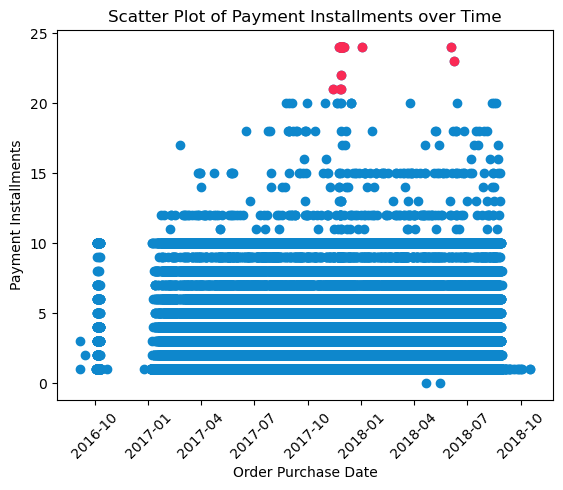

In [8]:
fig, ax = plt.subplots()

# 绘制所有点
ax.scatter(payments_time['order_purchase_timestamp'], payments_time['payment_installments'], color='#0e87cc')

# 找出payment_installments大于20的日期
dates_greater_than_20 = payments_time.loc[payments_time['payment_installments'] > 20, 'order_purchase_timestamp']

# 绘制payment_installments大于20的点
ax.scatter(dates_greater_than_20,  # X轴：日期
           payments_time.loc[payments_time['payment_installments'] > 20, 'payment_installments'],  # Y轴：payment_installments大于20的值
           color='#fa2a55')

# 设置X轴标签
ax.set_xlabel('Order Purchase Date')

# 设置Y轴标签
ax.set_ylabel('Payment Installments')

# 设置标题
ax.set_title('Scatter Plot of Payment Installments over Time')

# 自动旋转日期标签
plt.xticks(rotation=45)

# 显示图形
plt.show()


In [9]:
# 找出payment_installments大于20的日期
dates_greater_than_20 = payments_time.loc[payments_time['payment_installments'] > 20, 'order_purchase_timestamp']

print(dates_greater_than_20.dt.date.sort_values())

29578     2017-11-13
68731     2017-11-23
102551    2017-11-25
12180     2017-11-25
13166     2017-11-25
13834     2017-11-25
65973     2017-11-25
54635     2017-11-26
20818     2017-11-26
52802     2017-11-27
55198     2017-11-27
83733     2017-11-27
25139     2017-11-27
102149    2017-11-28
20361     2017-11-28
91508     2017-11-28
88635     2017-11-29
23755     2017-11-30
62198     2017-11-30
57377     2017-12-01
3434      2018-01-01
38553     2018-06-03
90874     2018-06-09
Name: order_purchase_timestamp, dtype: object


在2017年11月至12月期间，巴西的经济经历了一些显著变化和事件，这些变化对巴西经济的整体表现和未来走向产生了重要影响。以下是该时期的一些关键经济变化和事件：

1. 经济增长
经济复苏迹象：在2017年，巴西经济开始显示出复苏的迹象。在11月和12月，经济增长率有所上升，主要得益于农业和出口的强劲表现。根据巴西统计局的数据，巴西在2017年第三季度的GDP同比增长1.4%，这是连续三个季度实现增长。
2. 货币政策
降息措施：为了刺激经济增长，巴西中央银行在2017年11月宣布将基准利率（SELIC）从8.25%下调至7.5%，这是自2013年以来的最低水平。12月再次降息至7%。这一系列降息措施旨在降低借贷成本，促进消费和投资。
3. 通货膨胀
通胀控制：巴西的通胀率在2017年显著下降。到12月，年化通胀率降至2.95%，低于中央银行设定的4.5%的目标。这是由于食品价格下降以及经济活动的逐步恢复。
4. 劳动力市场
失业率变化：在2017年下半年，巴西的失业率有所改善。11月和12月的数据显示，失业率略有下降，尽管仍然处于较高水平。政府采取了多种措施以刺激就业市场，包括推动基础设施建设项目和提供就业培训计划。
5. 政治环境
政治稳定性影响经济信心：尽管经济有复苏迹象，但巴西的政治环境仍然不稳定。前总统米歇尔·特梅尔面临多项腐败指控，这影响了市场信心和投资者的情绪。然而，政府推动的经济改革（如劳动力市场改革和养老金改革）在一定程度上增强了经济信心。
6. 外贸和投资
出口增长：巴西在2017年11月至12月期间的出口表现强劲，主要受益于农产品（如大豆和玉米）和矿产（如铁矿石）价格的上涨。这对巴西的贸易平衡和外汇储备起到了积极作用。
7. 消费者信心
消费者信心回升：由于经济环境的改善和通胀的控制，消费者信心在年底有所回升。零售销售和消费支出在这段时间内有所增长，反映出居民对经济前景的乐观态度。
总的来说，2017年11月至12月，巴西在经济复苏、货币政策调整、通胀控制、劳动力市场改善等方面取得了一定的进展，但仍面临政治不稳定和结构性问题的挑战。这些经济变化为2018年的经济发展奠定了一定的基础。